In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
transactions = pd.read_csv('creditcard.csv')

In [3]:
transactions.shape

(284807, 31)

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
transactions.isnull().any().any()

False

In [6]:
transactions.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
126995,78173.0,-0.458058,0.624041,1.106114,1.069328,0.679128,0.929725,0.636754,0.233290,-0.688596,-0.183140,0.348602,0.742745,0.302001,0.132265,-0.460757,-0.772323,0.043301,0.085883,1.356934,0.209605,0.055413,0.263738,-0.129016,-0.815753,-0.027901,-0.208133,0.160112,0.131019,65.00,0
208981,137355.0,-0.159963,0.722736,0.232706,-0.569213,0.416794,-1.141140,0.813746,-0.140064,0.235480,-0.253121,-1.091458,-0.532387,-1.302340,0.345735,-0.197299,-0.102125,-0.282696,-0.687009,-0.138450,-0.162207,-0.257635,-0.662374,0.075575,-0.053195,-0.565085,0.135912,0.120879,0.086781,1.78,0
7267,9663.0,-1.178157,0.715470,1.423573,1.467534,0.377157,0.222116,0.149876,0.142945,1.261478,0.127816,1.754918,-2.609256,-0.366432,1.877349,-0.958922,-0.973343,1.177998,0.274614,0.880623,-0.284529,-0.184988,0.075538,0.054361,-0.073493,-0.181383,-0.294114,0.074951,0.169789,9.99,0
236592,148874.0,-2.758961,-0.767184,0.504186,0.140690,0.488052,-0.533802,-0.793928,0.814678,0.083731,-0.820713,-1.212443,0.818036,1.470456,-0.081192,0.284545,0.374757,-0.177457,0.117023,0.310159,-0.958411,0.076759,1.106531,1.375300,0.765216,0.022566,0.648585,0.074957,-0.246155,8.70,0
252876,156006.0,-0.481032,1.638926,-1.468706,0.800790,1.484205,0.148887,1.015453,0.467407,-0.975340,-0.670564,-0.049316,-0.356397,-1.090938,-0.389343,-0.696103,-0.080796,0.975636,1.270690,1.159866,0.059632,0.066888,0.250097,-0.271492,-0.349569,0.138703,-0.366482,0.307639,0.202006,37.15,0
82120,59249.0,-3.205987,-3.396308,0.950140,1.128256,-0.170521,0.407233,-0.613520,0.929848,-1.554851,0.010825,0.886455,0.628866,0.121252,0.509489,0.381393,-1.994452,0.710597,1.581465,-0.858831,1.070711,0.483224,0.299017,0.875538,-0.324472,-0.217063,-0.182598,0.013936,-0.298192,420.00,0
276499,167134.0,1.973844,0.109998,-1.758015,1.197728,0.665683,-0.587161,0.566058,-0.257125,-0.045586,0.415447,0.384030,0.926363,-0.191138,0.694628,-1.196477,-0.427827,-0.526547,-0.041016,0.209043,-0.230244,0.088939,0.409150,-0.082868,-0.457190,0.476395,-0.484684,-0.022373,-0.072455,29.34,0
278877,168498.0,2.189201,-1.662280,0.136241,-1.388765,-2.078101,-0.398255,-1.779707,-0.004094,-0.591322,1.451549,-1.022060,-0.535565,0.809079,-0.962980,0.101093,-0.172412,0.370787,0.155942,-0.410934,-0.384428,-0.126054,0.185516,0.337889,-0.036492,-0.562077,-0.244928,0.068340,-0.026795,31.00,0
56983,47702.0,1.506371,-0.183304,-0.508771,-0.868223,-0.071238,-0.885457,0.077773,-0.459488,-1.364481,0.634955,-0.674671,0.053310,2.044286,-0.288924,0.288562,0.887435,0.001819,-1.546252,0.938542,0.208454,0.156575,0.475611,-0.290701,-0.363648,0.964351,-0.038880,-0.018530,-0.002550,15.00,0
165006,117138.0,-2.507856,2.109205,-1.230294,-2.194448,-0.915442,-1.565537,-0.403738,1.515354,0.478480,-1.205680,-1.749366,1.157297,0.461358,0.753522,-1.683508,0.202256,0.135088,-0.586298,-0.912547,-0.197824,0.173281,0.517096,-0.100713,0.142270,0.161843,0.774485,0.140636,0.109276,1.00,0


In [7]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

### 1.1 Exploratory analysis of data

In [9]:
# explore the dataset
print(transactions.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [10]:
print(transactions.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

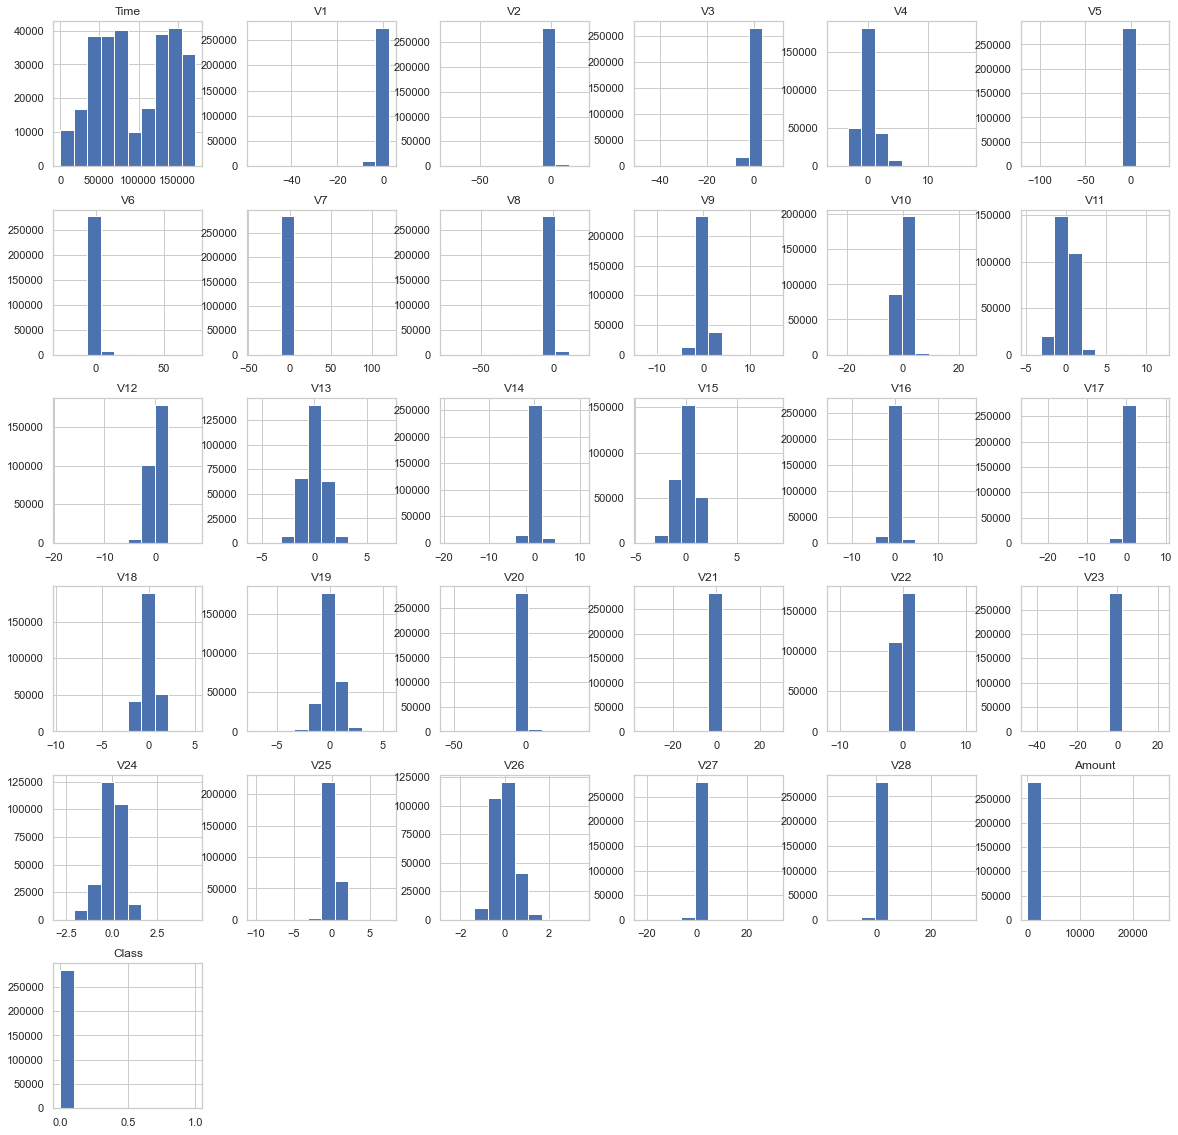

In [11]:
# Plot histogram of each parameter
transactions.hist(figsize = (20, 20))
plt.show()

In [12]:
# Determine number of fraud cases in dataset
Fraud = transactions[transactions['Class'] == 1]
Valid = transactions[transactions['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


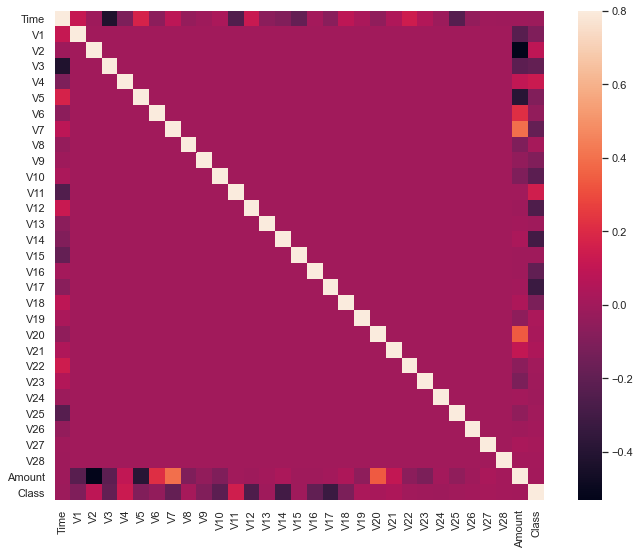

In [13]:
# Correlation matrix
corrmat = transactions.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square=True)
plt.show()

### 2. Split off a test data set

In [14]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']               # Response
del transactions                              # Delete the original data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
del X, y

In [17]:
X_train.shape

(1642, 30)

In [18]:

X_test.shape

(280607, 30)

In [19]:
# Prevent view warnings
X_train.is_copy = False
X_test.is_copy = False

### 2.1 Exploratory data analysis

Conducting exploratory data analysis for the trainig set

### Variable: Time

In [20]:
X_train['Time'].describe()

count      1642.000000
mean      92433.306943
std       48242.962200
min         130.000000
25%       52914.500000
50%       84956.000000
75%      137195.500000
max      172751.000000
Name: Time, dtype: float64

In [21]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

The time of last transaction in days:

In [22]:
X_train['Time'].max() / 24

1.9994328703703703

Conclusion: Transactions occur over an almost two day period.<br>
Plotting Histograms of transactions, one bin per hour

C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times')

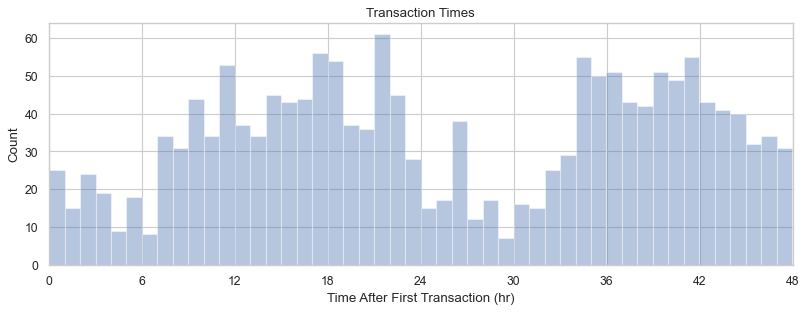

In [23]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

Histogram shows two observable lulls, around the dawn hours of each day

### Variable: Amount

In [24]:
X_train['Amount'].describe()

count    1642.000000
mean      101.257400
std       241.643296
min         0.000000
25%         3.790000
50%        22.010000
75%        88.900000
max      2793.600000
Name: Amount, dtype: float64

Comparing the different quantiles, we see that the distribution is more as we move towards the right.<br>
Histogram for the same:

Text(0.5, 1.0, 'Transaction Amounts')

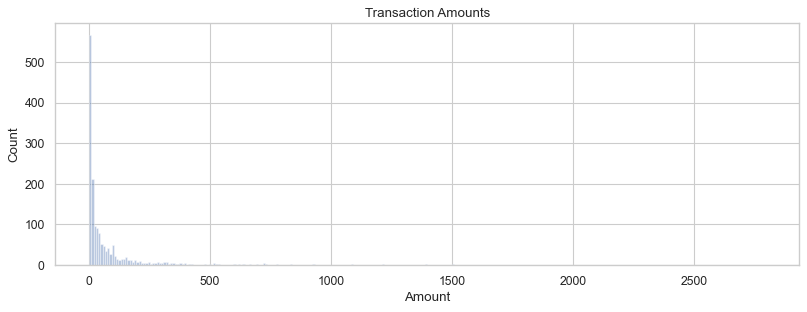

In [25]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

In the histogram, some data values are seen which differ greatly from the values. To visalise these better, a boxplot is plotted.

C:\Users\anush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transaction Amounts')

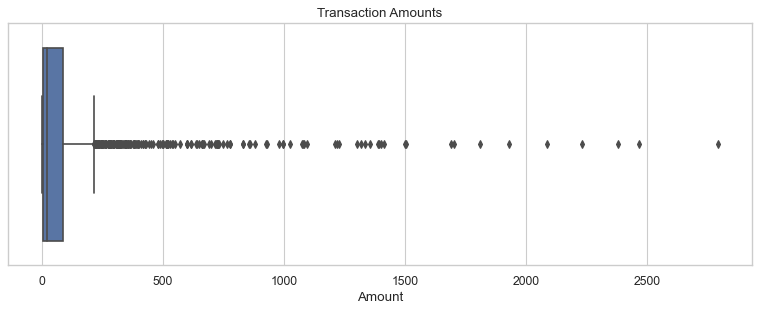

In [26]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

Box plot shows a large number of outliers towards the right of the data, indicating right skewness of the data. The skewness can be calculated as:

In [27]:
X_train['Amount'].skew()

5.364167630279151

Transforming variables to reduce skewness:

In [28]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9 # Shift all amounts by 1e-9

In [29]:
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)
maxlog

0.14949765833649528

In [30]:
(min_ci, max_ci)

(0.13516924575449346, 0.16475064326517136)

Plotting the modified values:

C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

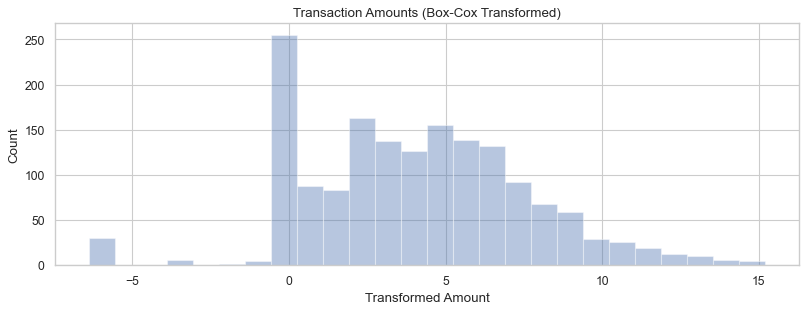

In [31]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [32]:
X_train['Amount'].describe()

count    1642.000000
mean        4.043222
std         3.537242
min        -6.387152
25%         1.474327
50%         3.929945
75%         6.394366
max        15.216731
Name: Amount, dtype: float64

In [33]:
X_train['Amount'].skew()

0.03461653644260046

Here, the skewness observed is close to zero, which is an ideal case.

In [34]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9

In [35]:
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)